<a href="https://colab.research.google.com/github/corvusMidnight/thesis/blob/main/ABLATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
##### IMPORTS #####
%%capture
!pip install -r requirements.txt | grep -v 'already satisfied'
!pip install demoji

!pip install lazypredict
!pip install plotly
!pip install emoji
!pip install tokenizer
!pip install transformers
!pip install simpletransformers
!pip install happytransformer
!pip install optunity

#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import seaborn as sns
import string
import operator
import plotly.express as px
from collections import Counter
from time import time
import pickle
from scipy import stats
import demoji

#NLP imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Baseline with LazyClassifier
from lazypredict.Supervised import LazyClassifier, LazyRegressor

#nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=set(stopwords.words('italian'))
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, FreqDist
stemmer = nltk.SnowballStemmer("italian")
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('punkt')

#Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

#Evaluation tools
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, log_loss
import optunity
import optunity.metrics


#Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#Pipeline visualization
from sklearn import set_config
from sklearn.utils import estimator_html_repr

#Pipeline display mode
set_config(display='diagram')


#Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from collections import Counter
from collections import defaultdict
import unicodedata as uni
from google.colab import drive 
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
from tokenizer import *
from transformers import AutoTokenizer, AutoModel
from simpletransformers.classification import ClassificationModel, ClassificationArgs

#Model tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#Neural and pretrained models
import torch
from torch import nn 
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from happytransformer import HappyTextClassification

from datasets import Dataset
from datasets import load_metric
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer

In [ ]:
## Load the data
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ITA_FB_TRAIN=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_train.csv')

ITA_FB_TEST=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
ITA_FB_TEST2=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
ITA_FB_TEST2.drop('Unnamed: 0', axis=1, inplace=True)


ITA_FB_REF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
ITA_FB_REF = ITA_FB_REF.rename(columns={0: 'ID', 1: 'text', 2: 'label'})

ITA_FB_TEST2['label'] = ITA_FB_REF['label'].values


## Baseline classifier

In [ ]:
df = ITA_FB_TRAIN
df = df.dropna()
df.text_lower_no_emoji = df.text_lower_no_emoji.astype(str)
#ITA_FB_TRAIN['label'] = ITA_FB_TRAIN['label'].astype(int)
df.columns

Index(['Unnamed: 0', 'ID', 'text', 'label', 'tokens', 'clean_tokens',
       'clean_tokens_lower', 'tokens_lower', 'text_lower', 'nr_emoticons',
       'percentage_emoticons', 'emoticons', 'number_flooding_letters',
       'percentage_flooding_letters', 'flooding_letters',
       'number_flooding_punct', 'percentage_flooding_punct',
       'flooding_punctuation', 'total_punct', 'nr_unconvcaps',
       'percentage_unconvcaps', 'unconv_caps', 'nr_kisses',
       'percentage_kisses', 'kisses_dict', 'nr_unconv_combis',
       'percentage_unconv_combis', 'unconv_combis_dict', 'nr_leetspeak',
       'percentage_leetspeak', 'leetspeak_words', 'nr_abbrev_forms',
       'percentage_abbrev_forms', 'abbrev_forms', 'nr_laughter',
       'percentage_laughter', 'laughter_dict', 'nr_discourse_markers',
       'discourse_markers', 'tokens_2', 'comment_length', 'tokens_3', 'CFR',
       'TTR', 'unique_emojis', 'text_lower_no_emoji', 'tokens_4', 'PNR'],
      dtype='object')


## Getting BERT-ita labels

1000
accuracy:   0.875
f1_score:   0.849
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       323
           1       0.87      0.95      0.91       677

    accuracy                           0.88      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.88      0.88      0.87      1000



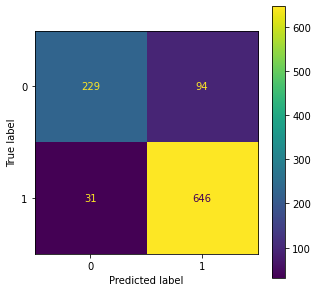

In [ ]:


model = AutoModelForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_ITABERT")
tokenizer = AutoTokenizer.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/Thesis/fine_tuned_ITABERT")


def prediction(text):
  text = demoji.replace(string=text, repl='')
  input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors= 'pt')


  logs = model(input_ids)
  logs = logs.logits.squeeze(0)

  prob = nn.functional.softmax(logs, dim=0)

  return prob.argmax().tolist()

#on unseen data


X_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/data_test.csv')
X_valid = X_valid.text_lower_no_emoji.astype(str).dropna()
y_pred = X_valid.apply(prediction)
y_pred = y_pred.values

print(len(y_pred))
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid.dropna()
y_valid.text = y_valid.text
y_valid = y_valid['label']
# compute the performance measures

score1 = metrics.accuracy_score(y_valid, y_pred)
score2 = metrics.f1_score(y_valid, y_pred, average='macro')

print("accuracy:   %0.3f" % score1)
print("f1_score:   %0.3f" % score2)

print(metrics.classification_report(y_valid, y_pred,
                                              target_names=['0', '1']))
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [ ]:
y_pred_PLB = y_pred

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'text', 'label', 'tokens', 'clean_tokens',
       'clean_tokens_lower', 'tokens_lower', 'text_lower', 'nr_emoticons',
       'percentage_emoticons', 'emoticons', 'number_flooding_letters',
       'percentage_flooding_letters', 'flooding_letters',
       'number_flooding_punct', 'percentage_flooding_punct',
       'flooding_punctuation', 'total_punct', 'nr_unconvcaps',
       'percentage_unconvcaps', 'unconv_caps', 'nr_kisses',
       'percentage_kisses', 'kisses_dict', 'nr_unconv_combis',
       'percentage_unconv_combis', 'unconv_combis_dict', 'nr_leetspeak',
       'percentage_leetspeak', 'leetspeak_words', 'nr_abbrev_forms',
       'percentage_abbrev_forms', 'abbrev_forms', 'nr_laughter',
       'percentage_laughter', 'laughter_dict', 'nr_discourse_markers',
       'discourse_markers', 'tokens_2', 'comment_length', 'tokens_3', 'CFR',
       'TTR', 'unique_emojis', 'text_lower_no_emoji', 'tokens_4', 'PNR'],
      dtype='object')

# Ablation

In [ ]:
df_1 = ITA_FB_TRAIN
df_2 = ITA_FB_TEST
df_1['text_lower_no_emoji'] = df_1.text_lower_no_emoji.astype(str).dropna()
df_1['y_pred_PLB'] = df_1.text_lower_no_emoji.apply(prediction)
df_2['y_pred_PLB'] = y_pred_PLB

In [ ]:
y_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Thesis/FB-folder/FB-reference/haspeede_FB-reference.tsv', sep='\t', header=None)
y_valid = y_valid.rename(columns={0: 'ID', 1: 'text', 2: 'label'})
y_valid = y_valid.dropna()
y_valid.text = y_valid.text
y_valid = y_valid['label']

In [ ]:
classifiers = [GradientBoostingClassifier(random_state = 0), AdaBoostClassifier(random_state = 0), SVC()] 
features = ['comment_length', 'CFR', 'TTR', 'unique_emojis', 'percentage_emoticons', 'PNR']
classifier = GradientBoostingClassifier(random_state = 0)

classification with GradientBoostingClassifier(random_state=0) and comment_length
accuracy:   0.874
f1_score:   0.848
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       323
           1       0.87      0.95      0.91       677

    accuracy                           0.87      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.87      0.87      0.87      1000

------------------------------------------------------------------------------------------
classification with GradientBoostingClassifier(random_state=0) and CFR
accuracy:   0.874
f1_score:   0.847
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       323
           1       0.87      0.95      0.91       677

    accuracy                           0.87      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.87      0.87      0.87      1000

------------------------------

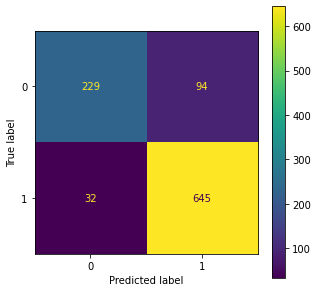

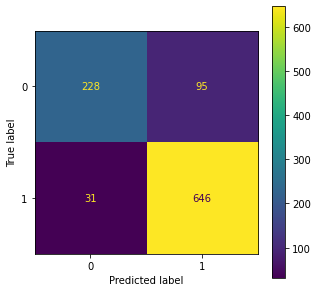

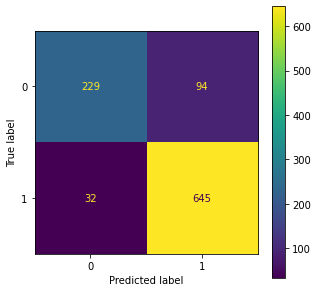

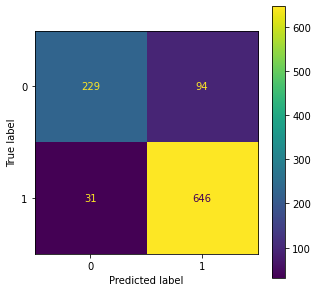

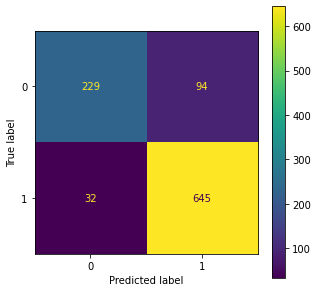

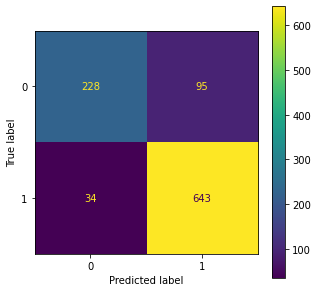

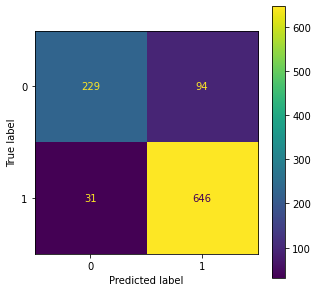

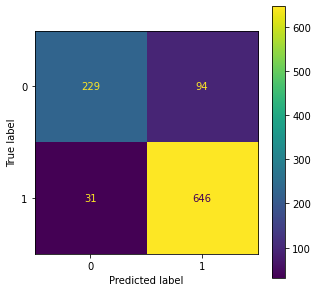

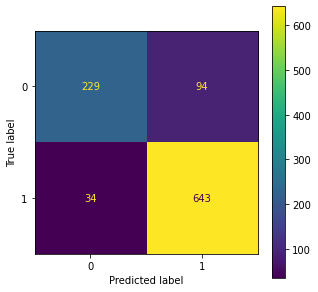

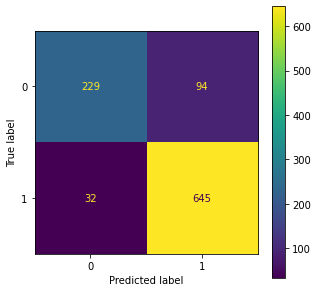

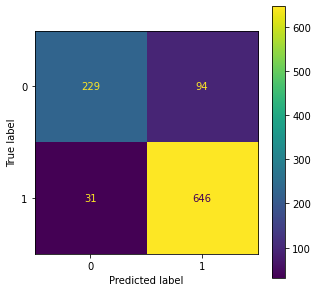

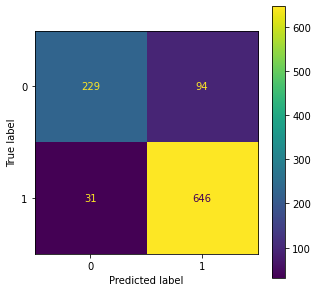

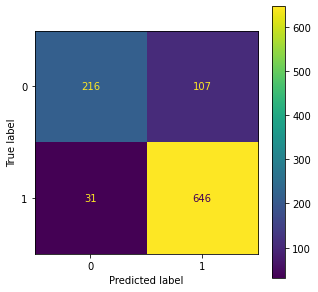

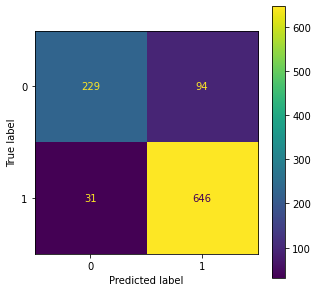

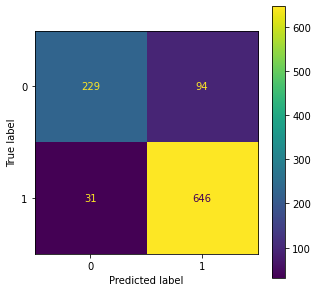

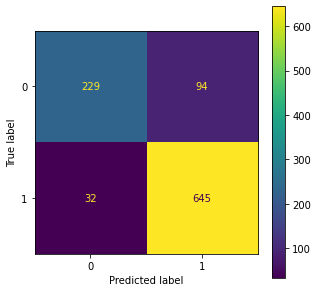

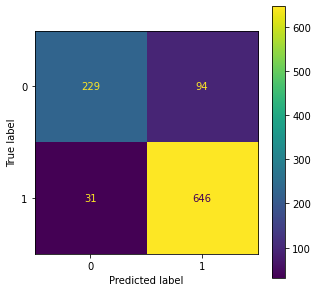

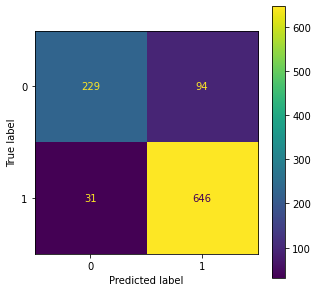

In [ ]:
for classifier in classifiers:
  
  classifier = classifier 

  for feature in features:
    
    print(f'classification with {classifier} and {feature}')
    X_train = df_1[['y_pred_PLB', feature]]
    y_train = df_1['label'].to_list()
    X_test = df_2[['y_pred_PLB', feature]] 
    y_test = y_valid.to_list()
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score1 = metrics.accuracy_score(y_valid, y_pred)
    score2 = metrics.f1_score(y_valid, y_pred, average='macro')

    print("accuracy:   %0.3f" % score1)
    print("f1_score:   %0.3f" % score2)

    print(metrics.classification_report(y_valid, y_pred,
                                              target_names=['0', '1']))
    print('------------------------------------------------------------------------------------------')
    cm = confusion_matrix(y_valid, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax=ax)

accuracy:   0.867
f1_score:   0.840
              precision    recall  f1-score   support

           0       0.86      0.71      0.77       323
           1       0.87      0.94      0.91       677

    accuracy                           0.87      1000
   macro avg       0.86      0.82      0.84      1000
weighted avg       0.87      0.87      0.86      1000

------------------------------------------------------------------------------------------


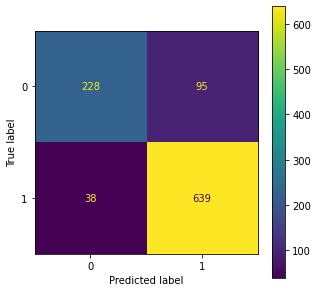

In [ ]:
classifier = GradientBoostingClassifier(random_state = 0)


X_train = df_1[['y_pred_PLB', 'comment_length', 'CFR', 'TTR', 'unique_emojis', 'percentage_emoticons', 'PNR']]
y_train = df_1['label'].to_list()
X_test = df_2[['y_pred_PLB', 'comment_length', 'CFR', 'TTR', 'unique_emojis', 'percentage_emoticons', 'PNR']] 
y_test = y_valid.to_list()
    
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score1 = metrics.accuracy_score(y_valid, y_pred)
score2 = metrics.f1_score(y_valid, y_pred, average='macro')

print("accuracy:   %0.3f" % score1)
print("f1_score:   %0.3f" % score2)

print(metrics.classification_report(y_valid, y_pred,
                                              target_names=['0', '1']))
print('------------------------------------------------------------------------------------------')
cm = confusion_matrix(y_valid, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)